### Imports

In [1]:
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn
import ray
from ray.train import ScalingConfig, RunConfig, FailureConfig
from ray.train.torch import TorchTrainer
from ray import tune
import os
import pickle
with open('pre-processed_data.pkl', 'rb') as f:
    data = pickle.load(f)
globals().update(data)

2025-05-14 22:54:17,365	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.8.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-05-14 22:54:17,800	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.8.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-05-14 22:54:17,905	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.8.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


### SARIMA Model

In [ ]:
model_sarima = pm.auto_arima(
    sarima_train,
    seasonal=True,
    m=12,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)    

In [ ]:
model_sarima.summary()

In [ ]:
sarima_pred = model_sarima.predict(n_periods=len(sarima_test))

In [ ]:
plt.plot(sarima_test.index, sarima_test, label='Actual Sales')
plt.plot(sarima_test.index, sarima_pred, label='Predicted Sales')
plt.ylabel('Sales ($)')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.show()

In [ ]:
sarima_test, sarima_pred

In [ ]:
rmse = root_mean_squared_error(sarima_test, sarima_pred)
mae = mean_absolute_error(sarima_test, sarima_pred)
mape = (abs((sarima_test - sarima_pred) / sarima_test)).mean() * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

### SARIMAX Model

In [ ]:
X_train = sarimax_train.drop(columns='Sales')
y_train = sarimax_train['Sales']

X_test = sarimax_test.drop(columns='Sales')
y_test = sarimax_test['Sales']

In [ ]:
model_sarimax = pm.auto_arima(
    y_train,
    exogenous=X_train,
    seasonal=True,
    m=12,
    d=1,
    D=1,
    stepwise=True,
    suppress_warnings=True,
    trace=True
) 

In [ ]:
model_sarimax.summary()

In [ ]:
sarimax_pred = model_sarimax.predict(n_periods=len(sarimax_test))

In [ ]:
plt.plot(sarimax_test.index, sarimax_test['Sales'], label='Actual Sales')
plt.plot(sarimax_test.index, sarimax_pred, label='Predicted Sales')
plt.ylabel('Sales ($)')
plt.title('SARIMAX Forecast vs Actual')
plt.legend()
plt.show()

In [ ]:
sarimax_test['Sales'], sarimax_pred

In [ ]:
actual_sales = sarimax_test['Sales']
predicted_sales = sarimax_pred

rmse = root_mean_squared_error(actual_sales, predicted_sales)
mae = mean_absolute_error(actual_sales, predicted_sales)
mape = (abs((actual_sales - predicted_sales) / actual_sales)).mean() * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

### LSTM Model

(train_lstm pid=43272) Epoch 0: loss = 48125264.000000


(train_lstm pid=43272) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=43272)   _log_deprecation_warning(
(train_lstm pid=43272) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=43272)   _log_deprecation_warning(
(train_lstm pid=43272) Checkpoint successfully created at: Checkpoi

(train_lstm pid=36388) Epoch 170: loss = 45067146.666667 [repeated 48x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)


(train_lstm pid=53728) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 7x across cluster]
(train_lstm pid=53728)   _log_deprecation_warning( [repeated 14x across cluster]
(train_lstm pid=53728) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0 [repeated 7x across cluster]
(train_lstm pid=51204) Checkpo

(train_lstm pid=51204) Epoch 380: loss = 44813510.666667 [repeated 38x across cluster]


(train_lstm pid=55944) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=55944)   _log_deprecation_warning(
(train_lstm pid=55944) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=55944)   _log_deprecation_warning(
(train_lstm pid=55944) Checkpoint successfully created at: Checkpoi

(train_lstm pid=55944) Epoch 0: loss = 47550724.000000 [repeated 16x across cluster]


(train_lstm pid=49728) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 5x across cluster]
(train_lstm pid=49728)   _log_deprecation_warning( [repeated 10x across cluster]
(train_lstm pid=49728) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0 [repeated 5x across cluster]
(train_lstm pid=36684) Checkpo

(train_lstm pid=36684) Epoch 60: loss = 43886794.666667 [repeated 11x across cluster]


(train_lstm pid=51472) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 2x across cluster]
(train_lstm pid=51472)   _log_deprecation_warning( [repeated 4x across cluster]
(train_lstm pid=51472) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0 [repeated 2x across cluster]
(train_lstm pid=51472) Checkpoi

(train_lstm pid=51472) Epoch 70: loss = 47206329.333333 [repeated 14x across cluster]


(train_lstm pid=51472) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_a7ef5_00015_15_epochs=700,hidden_layer_size=64,learning_rate=0.0137_2025-05-14_21-55-20/checkpoint_000023) [repeated 22x across cluster]


(train_lstm pid=51472) Epoch 230: loss = 42618864.000000 [repeated 22x across cluster]


(train_lstm pid=51472) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_a7ef5_00015_15_epochs=700,hidden_layer_size=64,learning_rate=0.0137_2025-05-14_21-55-20/checkpoint_000040) [repeated 23x across cluster]


(train_lstm pid=51472) Epoch 400: loss = 38769076.000000 [repeated 23x across cluster]


(train_lstm pid=54776) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=54776)   _log_deprecation_warning(
(train_lstm pid=54776) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=54776)   _log_deprecation_warning(
(train_lstm pid=51472) Checkpoint successfully created at: Checkpoi

(train_lstm pid=51472) Epoch 560: loss = 32904568.666667 [repeated 24x across cluster]


(train_lstm pid=45344) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 4x across cluster]
(train_lstm pid=45344)   _log_deprecation_warning( [repeated 8x across cluster]
(train_lstm pid=45344) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0 [repeated 4x across cluster]
(train_lstm pid=36684) Checkpoi

(train_lstm pid=36684) Epoch 350: loss = 26616743.333333 [repeated 54x across cluster]


(train_lstm pid=52628) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=52628)   _log_deprecation_warning( [repeated 2x across cluster]
(train_lstm pid=52628) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=48024) Checkpoint successfully created at: Checkpoint(filesystem=local, p

(train_lstm pid=48024) Epoch 330: loss = 31956351.333333 [repeated 28x across cluster]


(train_lstm pid=48024) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_a7ef5_00017_17_epochs=800,hidden_layer_size=64,learning_rate=0.0285_2025-05-14_21-55-20/checkpoint_000049) [repeated 22x across cluster]


(train_lstm pid=48024) Epoch 490: loss = 27116704.000000 [repeated 22x across cluster]


(train_lstm pid=48024) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_a7ef5_00017_17_epochs=800,hidden_layer_size=64,learning_rate=0.0285_2025-05-14_21-55-20/checkpoint_000064) [repeated 21x across cluster]


(train_lstm pid=48024) Epoch 640: loss = 21505576.666667 [repeated 21x across cluster]


(train_lstm pid=36684) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_a7ef5_00010_10_epochs=600,hidden_layer_size=64,learning_rate=0.0790_2025-05-14_21-55-20/checkpoint_000058) [repeated 20x across cluster]
(train_lstm pid=54568) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=54568)   _log_deprecation_warning(
(train_lstm pid=54568) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migrat

(train_lstm pid=36684) Epoch 580: loss = 18040380.000000 [repeated 20x across cluster]


(train_lstm pid=31156) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_a7ef5_00029_29_epochs=800,hidden_layer_size=64,learning_rate=0.0030_2025-05-14_21-55-20/checkpoint_000000) [repeated 12x across cluster]
(train_lstm pid=31156) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 6x across cluster]
(train_lstm pid=31156)   _log_deprecation_warning( [repeated 12x across cluster]
(train_lstm pid=31156) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please upda

(train_lstm pid=31156) Epoch 0: loss = 47550606.666667 [repeated 12x across cluster]


(train_lstm pid=19748) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_a7ef5_00028_28_epochs=500,hidden_layer_size=32,learning_rate=0.0878_2025-05-14_21-55-20/checkpoint_000013) [repeated 29x across cluster]
(train_lstm pid=30248) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 7x across cluster]
(train_lstm pid=30248)   _log_deprecation_warning( [repeated 14x across cluster]
(train_lstm pid=30248) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please upda

(train_lstm pid=19748) Epoch 130: loss = 40228507.333333 [repeated 29x across cluster]


(train_lstm pid=54196) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_a7ef5_00036_36_epochs=600,hidden_layer_size=64,learning_rate=0.0082_2025-05-14_21-55-20/checkpoint_000000) [repeated 3x across cluster]
(train_lstm pid=54196) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=54196)   _log_deprecation_warning( [repeated 2x across cluster]
(train_lstm pid=54196) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue

(train_lstm pid=54196) Epoch 0: loss = 47549192.000000 [repeated 3x across cluster]


(train_lstm pid=46568) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_a7ef5_00041_41_epochs=400,hidden_layer_size=32,learning_rate=0.0243_2025-05-14_21-55-20/checkpoint_000003) [repeated 13x across cluster]
(train_lstm pid=49884)   _log_deprecation_warning( [repeated 16x across cluster]
(train_lstm pid=49884) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 7x across cluster]
(train_lstm pid=49884) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please upda

(train_lstm pid=49884) Epoch 0: loss = 48118024.000000 [repeated 14x across cluster]
Best hyperparameters: {'hidden_layer_size': 64, 'learning_rate': 0.02848026275422519, 'epochs': 800, 'seed': 42}


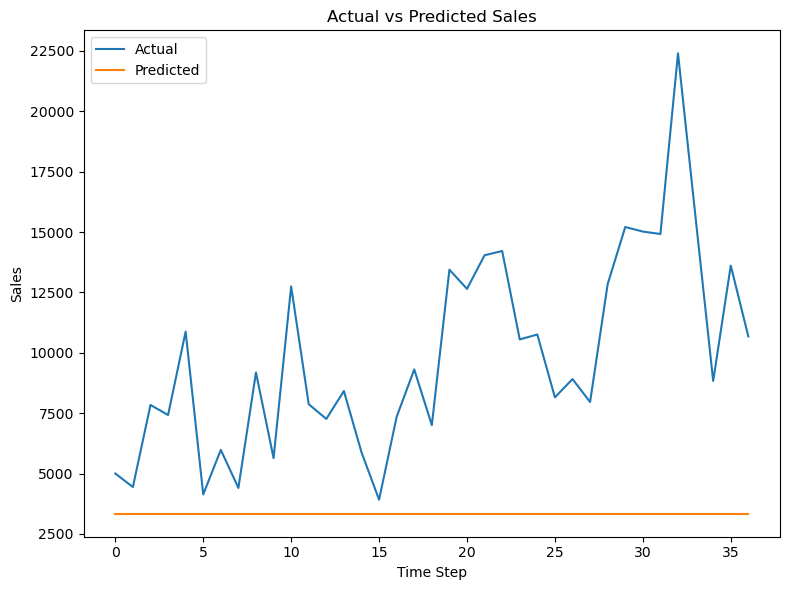

RMSE: 7672.31
MAE: 6513.61
MAPE: 59.56%


In [5]:
# 1) Standard library + ML imports
import os
import tempfile
import pathlib
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# 2) Ray imports
import ray
from ray import tune                                    
from ray.air import session, RunConfig
from ray.train import Checkpoint
from ray.tune.tune_config import TuneConfig
from ray.tune.schedulers import ASHAScheduler

# 3) Global seed & backend setup
SEED = 42  # ← change this to rerun with a different seed
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
# CUDNN determinism only needs to be set once globally:
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# 4) (Re)start Ray
ray.shutdown()
ray.init(ignore_reinit_error=True, logging_level="ERROR")

# 5) Updated LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True, num_layers=2)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout(out[:, -1, :])
        return self.fc(out)

# 6) Create sequences (assumes lstm_train & lstm_test exist)
X_train_df = lstm_train.drop(columns=['Sales'])
y_train_df = lstm_train[['Sales']]
X_test_df = lstm_test.drop(columns=['Sales'])
y_test_df = lstm_test[['Sales']]

SEQ_LENGTH = 4
def create_sequences(features_df, target_df, seq_length):
    X, y = [], []
    features = features_df.values
    target = target_df.values
    for i in range(len(features) - seq_length):
        X.append(features[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(X_train_df, y_train_df, SEQ_LENGTH)
X_test, y_test   = create_sequences(X_test_df, y_test_df, SEQ_LENGTH)

# Convert once globally
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train).view(-1, 1)
X_test_tensor  = torch.Tensor(X_test)
y_test_tensor  = torch.Tensor(y_test).view(-1, 1)

# 7) Training function for Ray Tune
def train_lstm(config):
    # Per-trial seed (no torch.backends here)
    trial_seed = config.get("seed", SEED)
    random.seed(trial_seed)
    np.random.seed(trial_seed)
    torch.manual_seed(trial_seed)
    torch.cuda.manual_seed_all(trial_seed)

    model = LSTMModel(
        input_size  = X_train_tensor.shape[2],
        hidden_size = config["hidden_layer_size"],
    )
    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=config["learning_rate"])
    epochs = config.get("epochs", 100)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: loss = {avg_loss:.6f}")
            with tempfile.TemporaryDirectory() as tmpdir:
                torch.save(model.state_dict(), os.path.join(tmpdir, "model.pt"))
                session.report(
                    {"loss": avg_loss},
                    checkpoint=Checkpoint.from_directory(tmpdir)
                )

# 8) Search space and scheduler (seed fixed)
search_space = {
    "hidden_layer_size": tune.choice([32, 64, 128, 256]),
    "learning_rate": tune.loguniform(0.001, 0.1),
    "epochs": tune.choice([300, 400, 500, 600, 700, 800]),
    "seed": SEED
}
scheduler = ASHAScheduler()

# 9) RunConfig and TuneConfig
trainable = tune.with_resources(train_lstm, {"cpu": 1})
run_cfg = RunConfig(
    name="lstm_experiment",
    stop={"training_iteration": 100},
    storage_path=str(pathlib.Path("E:/datasets/ray_results").resolve()),
    sync_config=None,
    log_to_file=False
)
tune_cfg = TuneConfig(
    metric="loss",
    mode="min",
    num_samples=50,
    scheduler=scheduler
)

# 10) Run the tuner
tuner = tune.Tuner(
    trainable,
    run_config=run_cfg,
    tune_config=tune_cfg,
    param_space=search_space
)
results = tuner.fit()

# 11) Load best model and evaluate
best = results.get_best_result(metric="loss", mode="min")
print("Best hyperparameters:", best.config)
ckpt_dir = best.checkpoint.to_directory()

best_model = LSTMModel(
    input_size = X_train_tensor.shape[2],
    hidden_size = best.config["hidden_layer_size"]
)
best_model.load_state_dict(torch.load(os.path.join(ckpt_dir, "model.pt")))

# 12) Predictions and evaluation
best_model.eval()
with torch.no_grad():
    y_pred = best_model(X_test_tensor).numpy().flatten()
    y_true = y_test_tensor.numpy().flatten()

# Plot
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_true)), y_true, label="Actual", color="tab:blue")
plt.plot(range(len(y_pred)), y_pred, label="Predicted", color="tab:orange")
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.xlabel("Time Step")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# 13) Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

def root_mean_squared_error(y_t, y_p):
    return np.sqrt(mean_squared_error(y_t, y_p))

rmse = root_mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-8))) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

(train_lstm pid=59760) Epoch 0: loss = 0.137683


(train_lstm pid=59760) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=59760)   _log_deprecation_warning(
(train_lstm pid=59760) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=59760)   _log_deprecation_warning(
(train_lstm pid=59760) Checkpoint successfully created at: Checkpoi

(train_lstm pid=59760) Epoch 10: loss = 0.035809


(train_lstm pid=59884) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 7x across cluster]
(train_lstm pid=59884)   _log_deprecation_warning( [repeated 14x across cluster]
(train_lstm pid=59884) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0 [repeated 7x across cluster]
(train_lstm pid=46896) Checkpo

(train_lstm pid=46896) Epoch 20: loss = 0.024915 [repeated 23x across cluster]


(train_lstm pid=59884) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00007_7_2025-05-14_23-22-59/checkpoint_000005) [repeated 39x across cluster]


(train_lstm pid=59884) Epoch 50: loss = 0.020813 [repeated 39x across cluster]


(train_lstm pid=59760) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00000_0_2025-05-14_23-22-59/checkpoint_000016) [repeated 33x across cluster]


(train_lstm pid=59760) Epoch 160: loss = 0.002216 [repeated 33x across cluster]
(train_lstm pid=59884) Epoch 130: loss = 0.002984 [repeated 32x across cluster]


(train_lstm pid=46896) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00006_6_2025-05-14_23-22-59/checkpoint_000015) [repeated 33x across cluster]


(train_lstm pid=15376) Epoch 190: loss = 0.001694 [repeated 40x across cluster]


(train_lstm pid=52072) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00002_2_2025-05-14_23-22-59/checkpoint_000021) [repeated 39x across cluster]
(train_lstm pid=59760) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00000_0_2025-05-14_23-22-59/checkpoint_000032) [repeated 41x across cluster]


(train_lstm pid=59760) Epoch 320: loss = 0.000502 [repeated 41x across cluster]
(train_lstm pid=57756) Epoch 300: loss = 0.000877 [repeated 37x across cluster]


(train_lstm pid=52072) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00002_2_2025-05-14_23-22-59/checkpoint_000031) [repeated 38x across cluster]


(train_lstm pid=52072) Epoch 350: loss = 0.000596 [repeated 33x across cluster]


(train_lstm pid=59760) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00000_0_2025-05-14_23-22-59/checkpoint_000043) [repeated 35x across cluster]


(train_lstm pid=58772) Epoch 390: loss = 0.000557 [repeated 38x across cluster]


(train_lstm pid=59884) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00007_7_2025-05-14_23-22-59/checkpoint_000037) [repeated 37x across cluster]


(train_lstm pid=46896) 
(train_lstm pid=52072) Epoch 440: loss = 0.000641 [repeated 34x across cluster]


(train_lstm pid=59760) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00000_0_2025-05-14_23-22-59/checkpoint_000053) [repeated 35x across cluster]
(train_lstm pid=59884) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00007_7_2025-05-14_23-22-59/checkpoint_000045) [repeated 32x across cluster]


(train_lstm pid=59884) Epoch 450: loss = 0.000486 [repeated 35x across cluster]


(train_lstm pid=59884) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00007_7_2025-05-14_23-22-59/checkpoint_000050) [repeated 41x across cluster]


(train_lstm pid=59884) Epoch 500: loss = 0.000383 [repeated 41x across cluster]


(train_lstm pid=52072) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00002_2_2025-05-14_23-22-59/checkpoint_000059) [repeated 42x across cluster]


(train_lstm pid=52072) Epoch 590: loss = 0.000523 [repeated 42x across cluster]


(train_lstm pid=52072) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00002_2_2025-05-14_23-22-59/checkpoint_000065) [repeated 46x across cluster]


(train_lstm pid=52072) Epoch 650: loss = 0.000321 [repeated 46x across cluster]


(train_lstm pid=58772) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00003_3_2025-05-14_23-22-59/checkpoint_000069) [repeated 45x across cluster]


(train_lstm pid=58772) Epoch 690: loss = 0.000597 [repeated 45x across cluster]


(train_lstm pid=58772) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00003_3_2025-05-14_23-22-59/checkpoint_000075) [repeated 42x across cluster]


(train_lstm pid=58772) Epoch 750: loss = 0.000344 [repeated 42x across cluster]


(train_lstm pid=59884) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00007_7_2025-05-14_23-22-59/checkpoint_000079) [repeated 37x across cluster]


(train_lstm pid=59884) Epoch 790: loss = 0.000433 [repeated 37x across cluster]


(train_lstm pid=58096) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=58096)   _log_deprecation_warning(
(train_lstm pid=58096) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=58096)   _log_deprecation_warning(
(train_lstm pid=58096) Checkpoint successfully created at: Checkpoi

(train_lstm pid=58096) Epoch 0: loss = 0.137683
(train_lstm pid=59492) Epoch 0: loss = 0.137683


(train_lstm pid=57984) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 2x across cluster]
(train_lstm pid=57984)   _log_deprecation_warning( [repeated 4x across cluster]
(train_lstm pid=57984) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0 [repeated 2x across cluster]
(train_lstm pid=59492) Checkpoi

(train_lstm pid=58096) Epoch 70: loss = 0.013584 [repeated 19x across cluster]


(train_lstm pid=59428) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 5x across cluster]
(train_lstm pid=59428)   _log_deprecation_warning( [repeated 10x across cluster]
(train_lstm pid=59428) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0 [repeated 5x across cluster]
(train_lstm pid=41456) Checkpo

(train_lstm pid=41456) Epoch 20: loss = 0.024915 [repeated 30x across cluster]
(train_lstm pid=38112) Epoch 80: loss = 0.011089 [repeated 44x across cluster]


(train_lstm pid=38112) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00015_15_2025-05-14_23-22-59/checkpoint_000008) [repeated 44x across cluster]


(train_lstm pid=59492) Epoch 230: loss = 0.000961 [repeated 42x across cluster]


(train_lstm pid=59492) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00009_9_2025-05-14_23-22-59/checkpoint_000023) [repeated 42x across cluster]
(train_lstm pid=57984) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00010_10_2025-05-14_23-22-59/checkpoint_000028) [repeated 46x across cluster]


(train_lstm pid=57984) Epoch 280: loss = 0.000555 [repeated 46x across cluster]


(train_lstm pid=59428) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00014_14_2025-05-14_23-22-59/checkpoint_000023) [repeated 43x across cluster]


(train_lstm pid=59428) Epoch 230: loss = 0.000961 [repeated 43x across cluster]


(train_lstm pid=59492) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00009_9_2025-05-14_23-22-59/checkpoint_000039) [repeated 41x across cluster]


(train_lstm pid=59492) Epoch 390: loss = 0.000557 [repeated 41x across cluster]
(train_lstm pid=32456) Epoch 350: loss = 0.000596 [repeated 45x across cluster]


(train_lstm pid=32456) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00013_13_2025-05-14_23-22-59/checkpoint_000035) [repeated 45x across cluster]
(train_lstm pid=59428) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00014_14_2025-05-14_23-22-59/checkpoint_000039) [repeated 43x across cluster]


(train_lstm pid=59428) Epoch 390: loss = 0.000557 [repeated 43x across cluster]


(train_lstm pid=60152) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00011_11_2025-05-14_23-22-59/checkpoint_000046) [repeated 42x across cluster]


(train_lstm pid=60152) Epoch 460: loss = 0.000471 [repeated 42x across cluster]
(train_lstm pid=58096) Epoch 610: loss = 0.000331 [repeated 44x across cluster]


(train_lstm pid=58096) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00008_8_2025-05-14_23-22-59/checkpoint_000061) [repeated 44x across cluster]


(train_lstm pid=38112) Epoch 560: loss = 0.000653 [repeated 41x across cluster]


(train_lstm pid=38112) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00015_15_2025-05-14_23-22-59/checkpoint_000056) [repeated 41x across cluster]


(train_lstm pid=59428) Epoch 600: loss = 0.000395 [repeated 44x across cluster]


(train_lstm pid=59428) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00014_14_2025-05-14_23-22-59/checkpoint_000060) [repeated 44x across cluster]
(train_lstm pid=57984) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00010_10_2025-05-14_23-22-59/checkpoint_000077) [repeated 45x across cluster]


(train_lstm pid=57984) Epoch 770: loss = 0.000422 [repeated 45x across cluster]


(train_lstm pid=59428) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00014_14_2025-05-14_23-22-59/checkpoint_000071) [repeated 34x across cluster]


(train_lstm pid=59428) Epoch 710: loss = 0.000455 [repeated 34x across cluster]


(train_lstm pid=59428) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00014_14_2025-05-14_23-22-59/checkpoint_000077) [repeated 29x across cluster]


(train_lstm pid=59428) Epoch 770: loss = 0.000422 [repeated 29x across cluster]


(train_lstm pid=58024) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=58024)   _log_deprecation_warning(
(train_lstm pid=58024) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=58024)   _log_deprecation_warning(
(train_lstm pid=59428) Checkpoint successfully created at: Checkpoi

(train_lstm pid=58024) Epoch 0: loss = 0.137683 [repeated 7x across cluster]


(train_lstm pid=58876) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 2x across cluster]
(train_lstm pid=58876)   _log_deprecation_warning( [repeated 4x across cluster]
(train_lstm pid=58876) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0 [repeated 2x across cluster]
(train_lstm pid=58876) Checkpoi

(train_lstm pid=58876) Epoch 50: loss = 0.020813 [repeated 18x across cluster]
(train_lstm pid=58164) Epoch 30: loss = 0.023607 [repeated 30x across cluster]


(train_lstm pid=45964) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 4x across cluster]
(train_lstm pid=45964)   _log_deprecation_warning( [repeated 8x across cluster]
(train_lstm pid=45964) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0 [repeated 4x across cluster]
(train_lstm pid=52460) Checkpoi

(train_lstm pid=58620) Epoch 80: loss = 0.011089 [repeated 39x across cluster]


(train_lstm pid=58876) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00017_17_2025-05-14_23-22-59/checkpoint_000017) [repeated 39x across cluster]
(train_lstm pid=58380) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=58380)   _log_deprecation_warning(
(train_lstm pid=58380) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issue

(train_lstm pid=52460) Epoch 230: loss = 0.000961 [repeated 41x across cluster]


(train_lstm pid=58164) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00019_19_2025-05-14_23-22-59/checkpoint_000014) [repeated 41x across cluster]


(train_lstm pid=45964) Epoch 180: loss = 0.001096 [repeated 43x across cluster]


(train_lstm pid=44468) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00022_22_2025-05-14_23-22-59/checkpoint_000019) [repeated 43x across cluster]


(train_lstm pid=58876) Epoch 330: loss = 0.000507 [repeated 42x across cluster]


(train_lstm pid=58876) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00017_17_2025-05-14_23-22-59/checkpoint_000033) [repeated 41x across cluster]
(train_lstm pid=58164) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00019_19_2025-05-14_23-22-59/checkpoint_000030) [repeated 44x across cluster]


(train_lstm pid=58164) Epoch 300: loss = 0.000877 [repeated 44x across cluster]


(train_lstm pid=52460) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00018_18_2025-05-14_23-22-59/checkpoint_000045) [repeated 44x across cluster]


(train_lstm pid=52460) Epoch 450: loss = 0.000486 [repeated 44x across cluster]


(train_lstm pid=58164) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00019_19_2025-05-14_23-22-59/checkpoint_000040) [repeated 39x across cluster]


(train_lstm pid=58164) Epoch 400: loss = 0.000523 [repeated 39x across cluster]
(train_lstm pid=45964) Epoch 440: loss = 0.000641 [repeated 42x across cluster]


(train_lstm pid=45964) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00021_21_2025-05-14_23-22-59/checkpoint_000044) [repeated 42x across cluster]
(train_lstm pid=58164) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00019_19_2025-05-14_23-22-59/checkpoint_000050) [repeated 42x across cluster]


(train_lstm pid=58164) Epoch 500: loss = 0.000383 [repeated 42x across cluster]


(train_lstm pid=58876) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00017_17_2025-05-14_23-22-59/checkpoint_000065) [repeated 43x across cluster]


(train_lstm pid=58876) Epoch 650: loss = 0.000321 [repeated 43x across cluster]


(train_lstm pid=58164) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00019_19_2025-05-14_23-22-59/checkpoint_000061) [repeated 45x across cluster]


(train_lstm pid=58164) Epoch 610: loss = 0.000331 [repeated 45x across cluster]


(train_lstm pid=44468) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00022_22_2025-05-14_23-22-59/checkpoint_000068) [repeated 45x across cluster]


(train_lstm pid=58024) Epoch 780: loss = 0.000374 [repeated 46x across cluster]


(train_lstm pid=58164) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00019_19_2025-05-14_23-22-59/checkpoint_000072) [repeated 35x across cluster]


(train_lstm pid=44468) Epoch 740: loss = 0.000545 [repeated 37x across cluster]


(train_lstm pid=58380) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00023_23_2025-05-14_23-22-59/checkpoint_000068) [repeated 32x across cluster]


(train_lstm pid=58620) Epoch 790: loss = 0.000433 [repeated 30x across cluster]


(train_lstm pid=58380) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00023_23_2025-05-14_23-22-59/checkpoint_000075) [repeated 11x across cluster]


(train_lstm pid=58380) Epoch 750: loss = 0.000344 [repeated 10x across cluster]


(train_lstm pid=59544) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=59544)   _log_deprecation_warning(
(train_lstm pid=59544) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=59544)   _log_deprecation_warning(
(train_lstm pid=59544) Checkpoint successfully created at: Checkpoi

(train_lstm pid=59544) Epoch 0: loss = 0.137683 [repeated 5x across cluster]


(train_lstm pid=60328) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 6x across cluster]
(train_lstm pid=60328)   _log_deprecation_warning( [repeated 12x across cluster]
(train_lstm pid=60328) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0 [repeated 6x across cluster]
(train_lstm pid=59544) Checkpo

(train_lstm pid=59544) Epoch 60: loss = 0.019696 [repeated 34x across cluster]


(train_lstm pid=59168) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00028_28_2025-05-14_23-22-59/checkpoint_000009) [repeated 38x across cluster]


(train_lstm pid=59168) Epoch 90: loss = 0.006982 [repeated 38x across cluster]


(train_lstm pid=58060) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00029_29_2025-05-14_23-22-59/checkpoint_000015) [repeated 38x across cluster]


(train_lstm pid=59544) Epoch 170: loss = 0.001462 [repeated 39x across cluster]


(train_lstm pid=59744) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=59744)   _log_deprecation_warning(
(train_lstm pid=59744) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=59744)   _log_deprecation_warning(
(train_lstm pid=59744) Checkpoint successfully created at: Checkpoi

(train_lstm pid=50492) Epoch 210: loss = 0.000853 [repeated 45x across cluster]


(train_lstm pid=59040) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00026_26_2025-05-14_23-22-59/checkpoint_000028) [repeated 43x across cluster]


(train_lstm pid=59744) Epoch 100: loss = 0.006836 [repeated 45x across cluster]


(train_lstm pid=60328) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00030_30_2025-05-14_23-22-59/checkpoint_000029) [repeated 44x across cluster]


(train_lstm pid=59040) Epoch 340: loss = 0.000509 [repeated 43x across cluster]


(train_lstm pid=4044) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00024_24_2025-05-14_23-22-59/checkpoint_000038) [repeated 41x across cluster]


(train_lstm pid=50492) Epoch 370: loss = 0.000476 [repeated 43x across cluster]


(train_lstm pid=4044) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00024_24_2025-05-14_23-22-59/checkpoint_000043) [repeated 45x across cluster]


(train_lstm pid=59544) Epoch 440: loss = 0.000641 [repeated 41x across cluster]


(train_lstm pid=59544) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00025_25_2025-05-14_23-22-59/checkpoint_000049) [repeated 42x across cluster]


(train_lstm pid=4044) Epoch 490: loss = 0.000524 [repeated 45x across cluster]


(train_lstm pid=60328) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00030_30_2025-05-14_23-22-59/checkpoint_000051) [repeated 44x across cluster]


(train_lstm pid=59544) Epoch 550: loss = 0.000429 [repeated 43x across cluster]


(train_lstm pid=59544) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00025_25_2025-05-14_23-22-59/checkpoint_000060) [repeated 44x across cluster]


(train_lstm pid=4044) Epoch 600: loss = 0.000395 [repeated 46x across cluster]


(train_lstm pid=4044) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00024_24_2025-05-14_23-22-59/checkpoint_000065) [repeated 46x across cluster]


(train_lstm pid=59544) Epoch 660: loss = 0.000340 [repeated 43x across cluster]


(train_lstm pid=58060) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00029_29_2025-05-14_23-22-59/checkpoint_000070) [repeated 47x across cluster]


(train_lstm pid=59040) Epoch 720: loss = 0.000397 [repeated 47x across cluster]


(train_lstm pid=59040) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00026_26_2025-05-14_23-22-59/checkpoint_000077) [repeated 43x across cluster]


(train_lstm pid=58060) Epoch 760: loss = 0.000368 [repeated 44x across cluster]


(train_lstm pid=59744) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00031_31_2025-05-14_23-22-59/checkpoint_000064) [repeated 32x across cluster]


(train_lstm pid=59744) Epoch 640: loss = 0.000374 [repeated 28x across cluster]


(train_lstm pid=59744) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00031_31_2025-05-14_23-22-59/checkpoint_000071) [repeated 7x across cluster]


(train_lstm pid=59744) Epoch 710: loss = 0.000455 [repeated 7x across cluster]


(train_lstm pid=59744) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00031_31_2025-05-14_23-22-59/checkpoint_000077) [repeated 6x across cluster]


(train_lstm pid=59744) Epoch 780: loss = 0.000374 [repeated 7x across cluster]


(train_lstm pid=59640) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=59640)   _log_deprecation_warning(
(train_lstm pid=59640) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=59640)   _log_deprecation_warning(
(train_lstm pid=59640) Checkpoint successfully created at: Checkpoi

(train_lstm pid=59640) Epoch 0: loss = 0.137683 [repeated 2x across cluster]


(train_lstm pid=58032) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 6x across cluster]
(train_lstm pid=58032)   _log_deprecation_warning( [repeated 12x across cluster]
(train_lstm pid=58032) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0 [repeated 6x across cluster]
(train_lstm pid=59640) Checkpo

(train_lstm pid=59640) Epoch 60: loss = 0.019696 [repeated 32x across cluster]


(train_lstm pid=56296) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00036_36_2025-05-14_23-22-59/checkpoint_000009) [repeated 40x across cluster]


(train_lstm pid=56296) Epoch 90: loss = 0.006982 [repeated 40x across cluster]


(train_lstm pid=59692) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00032_32_2025-05-14_23-22-59/checkpoint_000016) [repeated 39x across cluster]


(train_lstm pid=56744) Epoch 170: loss = 0.001462 [repeated 40x across cluster]


(train_lstm pid=8788) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=8788)   _log_deprecation_warning(
(train_lstm pid=8788) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=8788)   _log_deprecation_warning(
(train_lstm pid=59640) Checkpoint successfully created at: Checkpoint(f

(train_lstm pid=59640) Epoch 230: loss = 0.000961 [repeated 38x across cluster]


(train_lstm pid=59752) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00035_35_2025-05-14_23-22-59/checkpoint_000027) [repeated 43x across cluster]


(train_lstm pid=59752) Epoch 270: loss = 0.000744 [repeated 43x across cluster]


(train_lstm pid=56744) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00033_33_2025-05-14_23-22-59/checkpoint_000033) [repeated 43x across cluster]


(train_lstm pid=58044) Epoch 310: loss = 0.000959 [repeated 44x across cluster]


(train_lstm pid=58032) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00038_38_2025-05-14_23-22-59/checkpoint_000034) [repeated 42x across cluster]


(train_lstm pid=58032) Epoch 340: loss = 0.000509 [repeated 41x across cluster]


(train_lstm pid=8788) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00039_39_2025-05-14_23-22-59/checkpoint_000022) [repeated 43x across cluster]


(train_lstm pid=8788) Epoch 220: loss = 0.000649 [repeated 43x across cluster]


(train_lstm pid=59692) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00032_32_2025-05-14_23-22-59/checkpoint_000048) [repeated 42x across cluster]


(train_lstm pid=59692) Epoch 480: loss = 0.000585 [repeated 42x across cluster]


(train_lstm pid=59752) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00035_35_2025-05-14_23-22-59/checkpoint_000053) [repeated 43x across cluster]


(train_lstm pid=59752) Epoch 530: loss = 0.000318 [repeated 43x across cluster]


(train_lstm pid=56744) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00033_33_2025-05-14_23-22-59/checkpoint_000060) [repeated 43x across cluster]


(train_lstm pid=56744) Epoch 600: loss = 0.000395 [repeated 43x across cluster]
(train_lstm pid=58044) Epoch 630: loss = 0.000408 [repeated 43x across cluster]


(train_lstm pid=58032) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00038_38_2025-05-14_23-22-59/checkpoint_000061) [repeated 44x across cluster]
(train_lstm pid=59640) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00034_34_2025-05-14_23-22-59/checkpoint_000071) [repeated 41x across cluster]


(train_lstm pid=59692) Epoch 700: loss = 0.000551 [repeated 43x across cluster]


(train_lstm pid=8788) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00039_39_2025-05-14_23-22-59/checkpoint_000054) [repeated 43x across cluster]


(train_lstm pid=56744) Epoch 760: loss = 0.000368 [repeated 43x across cluster]


(raylet) Traceback (most recent call last):
(raylet)   File "C:\Users\justi\anaconda3\Lib\site-packages\ray\_private\workers\default_worker.py", line 8, in <module>
(raylet)     import ray
(raylet)     _configure_system()
(raylet)   File "C:\Users\justi\anaconda3\Lib\site-packages\ray\__init__.py", line 70, in _configure_system
(raylet)     import ctypes
(raylet)     from _ctypes import Union, Structure, Array
(raylet) ImportError: DLL load failed while importing _ctypes: The handle is invalid.
(train_lstm pid=56296) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00036_36_2025-05-14_23-22-59/checkpoint_000078) [repeated 37x across cluster]


(train_lstm pid=58044) Epoch 790: loss = 0.000433 [repeated 38x across cluster]


(raylet)   File "C:\Users\justi\anaconda3\Lib\ctypes\__init__.py", line 8, in <module> [repeated 2x across cluster]
(train_lstm pid=8788) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00039_39_2025-05-14_23-22-59/checkpoint_000066) [repeated 12x across cluster]


(train_lstm pid=8788) Epoch 660: loss = 0.000340 [repeated 10x across cluster]
(train_lstm pid=8788) Epoch 730: loss = 0.000350 [repeated 7x across cluster]


(train_lstm pid=8788) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00039_39_2025-05-14_23-22-59/checkpoint_000073) [repeated 7x across cluster]
(train_lstm pid=51364) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=51364)   _log_deprecation_warning(
(train_lstm pid=51364) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/

(train_lstm pid=51364) Epoch 0: loss = 0.137683 [repeated 7x across cluster]


(train_lstm pid=60480) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 6x across cluster]
(train_lstm pid=60480)   _log_deprecation_warning( [repeated 12x across cluster]
(train_lstm pid=60480) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0 [repeated 6x across cluster]
(train_lstm pid=57972) Checkpo

(train_lstm pid=57972) Epoch 40: loss = 0.023920 [repeated 27x across cluster]


(train_lstm pid=58412) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00041_41_2025-05-14_23-22-59/checkpoint_000010) [repeated 39x across cluster]


(train_lstm pid=58412) Epoch 100: loss = 0.006836 [repeated 39x across cluster]


(train_lstm pid=51364) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00040_40_2025-05-14_23-22-59/checkpoint_000017) [repeated 41x across cluster]


(train_lstm pid=51364) Epoch 170: loss = 0.001462 [repeated 41x across cluster]


(raylet) [2025-05-14 23:33:42,924 E 39848 59404] (raylet.exe) worker_pool.cc:581: Some workers of the worker process(59480) have not registered within the timeout. The process is dead, probably it crashed during start.
(train_lstm pid=58412) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00041_41_2025-05-14_23-22-59/checkpoint_000021) [repeated 36x across cluster]


(train_lstm pid=58412) Epoch 210: loss = 0.000853 [repeated 36x across cluster]


(train_lstm pid=54548) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=54548)   _log_deprecation_warning(
(train_lstm pid=54548) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=54548)   _log_deprecation_warning(
(train_lstm pid=51364) Checkpoint successfully created at: Checkpoi

(train_lstm pid=51364) Epoch 280: loss = 0.000555 [repeated 42x across cluster]


(train_lstm pid=36080) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00042_42_2025-05-14_23-22-59/checkpoint_000032) [repeated 43x across cluster]


(train_lstm pid=60480) Epoch 280: loss = 0.000555 [repeated 44x across cluster]


(train_lstm pid=61264) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00043_43_2025-05-14_23-22-59/checkpoint_000034) [repeated 42x across cluster]


(train_lstm pid=61264) Epoch 340: loss = 0.000509 [repeated 41x across cluster]


(train_lstm pid=58412) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00041_41_2025-05-14_23-22-59/checkpoint_000043) [repeated 43x across cluster]


(train_lstm pid=58412) Epoch 430: loss = 0.000807 [repeated 43x across cluster]


(train_lstm pid=54548) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00047_47_2025-05-14_23-22-59/checkpoint_000022) [repeated 43x across cluster]


(train_lstm pid=51364) Epoch 500: loss = 0.000383 [repeated 45x across cluster]


(train_lstm pid=36080) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00042_42_2025-05-14_23-22-59/checkpoint_000054) [repeated 45x across cluster]


(train_lstm pid=36080) Epoch 540: loss = 0.000524 [repeated 43x across cluster]


(train_lstm pid=54548) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00047_47_2025-05-14_23-22-59/checkpoint_000033) [repeated 43x across cluster]


(train_lstm pid=54548) Epoch 330: loss = 0.000507 [repeated 43x across cluster]


(train_lstm pid=60480) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00046_46_2025-05-14_23-22-59/checkpoint_000060) [repeated 44x across cluster]


(train_lstm pid=60480) Epoch 600: loss = 0.000395 [repeated 44x across cluster]


(train_lstm pid=61264) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00043_43_2025-05-14_23-22-59/checkpoint_000066) [repeated 42x across cluster]


(train_lstm pid=61264) Epoch 660: loss = 0.000340 [repeated 42x across cluster]


(train_lstm pid=51364) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00040_40_2025-05-14_23-22-59/checkpoint_000077) [repeated 43x across cluster]


(train_lstm pid=51364) Epoch 770: loss = 0.000422 [repeated 43x across cluster]
(train_lstm pid=60480) Epoch 770: loss = 0.000422 [repeated 37x across cluster]


(train_lstm pid=61264) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00043_43_2025-05-14_23-22-59/checkpoint_000078) [repeated 37x across cluster]


(train_lstm pid=54548) Epoch 610: loss = 0.000331 [repeated 11x across cluster]


(train_lstm pid=54548) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00047_47_2025-05-14_23-22-59/checkpoint_000062) [repeated 12x across cluster]


(train_lstm pid=54548) Epoch 660: loss = 0.000340 [repeated 5x across cluster]


(train_lstm pid=54548) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00047_47_2025-05-14_23-22-59/checkpoint_000067) [repeated 5x across cluster]


(train_lstm pid=54548) Epoch 720: loss = 0.000397 [repeated 6x across cluster]


(train_lstm pid=54548) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00047_47_2025-05-14_23-22-59/checkpoint_000074) [repeated 7x across cluster]


(train_lstm pid=54548) Epoch 790: loss = 0.000433 [repeated 7x across cluster]


(train_lstm pid=56996) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=56996)   _log_deprecation_warning(
(train_lstm pid=56996) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=56996)   _log_deprecation_warning(
(train_lstm pid=56996) Checkpoint successfully created at: Checkpoi

(train_lstm pid=56996) Epoch 0: loss = 0.137683
(train_lstm pid=53032) Epoch 0: loss = 0.137683


(train_lstm pid=42588) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 6x across cluster]
(train_lstm pid=42588)   _log_deprecation_warning( [repeated 12x across cluster]
(train_lstm pid=42588) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0 [repeated 6x across cluster]
(train_lstm pid=58268) Checkpo

(train_lstm pid=58268) Epoch 50: loss = 0.020813 [repeated 29x across cluster]


(train_lstm pid=53032) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00048_48_2025-05-14_23-22-59/checkpoint_000011) [repeated 39x across cluster]


(train_lstm pid=53032) Epoch 110: loss = 0.004723 [repeated 39x across cluster]
(train_lstm pid=53032) Epoch 170: loss = 0.001462 [repeated 42x across cluster]


(train_lstm pid=53032) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00048_48_2025-05-14_23-22-59/checkpoint_000017) [repeated 42x across cluster]
(train_lstm pid=56996) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00049_49_2025-05-14_23-22-59/checkpoint_000023) [repeated 35x across cluster]


(train_lstm pid=56996) Epoch 230: loss = 0.000961 [repeated 35x across cluster]


(train_lstm pid=50096) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=50096)   _log_deprecation_warning(
(train_lstm pid=50096) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=50096)   _log_deprecation_warning(
(train_lstm pid=56996) Checkpoint successfully created at: Checkpoi

(train_lstm pid=56996) Epoch 290: loss = 0.000597 [repeated 44x across cluster]


(train_lstm pid=61156) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00051_51_2025-05-14_23-22-59/checkpoint_000031) [repeated 47x across cluster]


(train_lstm pid=61156) Epoch 310: loss = 0.000959 [repeated 47x across cluster]


(train_lstm pid=56996) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00049_49_2025-05-14_23-22-59/checkpoint_000040) [repeated 42x across cluster]


(train_lstm pid=56996) Epoch 400: loss = 0.000523 [repeated 42x across cluster]


(train_lstm pid=50096) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00055_55_2025-05-14_23-22-59/checkpoint_000018) [repeated 44x across cluster]


(train_lstm pid=50096) Epoch 180: loss = 0.001096 [repeated 44x across cluster]


(train_lstm pid=61156) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00051_51_2025-05-14_23-22-59/checkpoint_000047) [repeated 42x across cluster]


(train_lstm pid=61156) Epoch 470: loss = 0.000483 [repeated 42x across cluster]


(train_lstm pid=53032) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00048_48_2025-05-14_23-22-59/checkpoint_000055) [repeated 44x across cluster]


(train_lstm pid=53032) Epoch 550: loss = 0.000429 [repeated 44x across cluster]


(train_lstm pid=56996) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00049_49_2025-05-14_23-22-59/checkpoint_000062) [repeated 48x across cluster]


(train_lstm pid=56996) Epoch 620: loss = 0.000489 [repeated 48x across cluster]


(train_lstm pid=58268) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00050_50_2025-05-14_23-22-59/checkpoint_000067) [repeated 44x across cluster]


(train_lstm pid=58268) Epoch 670: loss = 0.000331 [repeated 44x across cluster]
(train_lstm pid=56996) Epoch 740: loss = 0.000545 [repeated 48x across cluster]


(train_lstm pid=42588) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00054_54_2025-05-14_23-22-59/checkpoint_000068) [repeated 49x across cluster]
(train_lstm pid=61156) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00051_51_2025-05-14_23-22-59/checkpoint_000076) [repeated 46x across cluster]


(train_lstm pid=61140) Epoch 770: loss = 0.000422 [repeated 48x across cluster]


(train_lstm pid=50096) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00055_55_2025-05-14_23-22-59/checkpoint_000062) [repeated 26x across cluster]


(train_lstm pid=50096) Epoch 620: loss = 0.000489 [repeated 25x across cluster]


(train_lstm pid=50096) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00055_55_2025-05-14_23-22-59/checkpoint_000070) [repeated 8x across cluster]


(train_lstm pid=50096) Epoch 700: loss = 0.000551 [repeated 8x across cluster]
(train_lstm pid=50096) Epoch 790: loss = 0.000433 [repeated 9x across cluster]


(train_lstm pid=50096) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00055_55_2025-05-14_23-22-59/checkpoint_000079) [repeated 9x across cluster]
(train_lstm pid=38452) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=38452)   _log_deprecation_warning(
(train_lstm pid=38452) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues

(train_lstm pid=38452) Epoch 0: loss = 0.137683
(train_lstm pid=46176) Epoch 0: loss = 0.137683
(train_lstm pid=46176) Epoch 70: loss = 0.013584 [repeated 35x across cluster]


(train_lstm pid=57460) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 6x across cluster]
(train_lstm pid=57460)   _log_deprecation_warning( [repeated 12x across cluster]
(train_lstm pid=57460) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0 [repeated 6x across cluster]
(train_lstm pid=57824) Checkpo

(train_lstm pid=46604) Epoch 100: loss = 0.006836 [repeated 45x across cluster]


(train_lstm pid=46176) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00057_57_2025-05-14_23-22-59/checkpoint_000021) [repeated 50x across cluster]


(train_lstm pid=46176) Epoch 210: loss = 0.000853 [repeated 49x across cluster]


(train_lstm pid=38452) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00056_56_2025-05-14_23-22-59/checkpoint_000027) [repeated 48x across cluster]


(train_lstm pid=38452) Epoch 270: loss = 0.000744 [repeated 48x across cluster]
(train_lstm pid=46604) Epoch 290: loss = 0.000597 [repeated 36x across cluster]


(train_lstm pid=46604) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00059_59_2025-05-14_23-23-00/checkpoint_000029) [repeated 36x across cluster]
(train_lstm pid=61948) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=61948)   _log_deprecation_warning(
(train_lstm pid=61948) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issue

(train_lstm pid=57824) Epoch 360: loss = 0.000403 [repeated 50x across cluster]


(train_lstm pid=46604) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00059_59_2025-05-14_23-23-00/checkpoint_000036) [repeated 51x across cluster]
(raylet) [2025-05-14 23:37:44,440 E 39848 59404] (raylet.exe) worker_pool.cc:581: Some workers of the worker process(60276) have not registered within the timeout. The process is still alive, probably it's hanging during start.


(train_lstm pid=57824) Epoch 420: loss = 0.000511 [repeated 47x across cluster]


(train_lstm pid=57824) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00060_60_2025-05-14_23-23-00/checkpoint_000042) [repeated 46x across cluster]


(train_lstm pid=57824) Epoch 480: loss = 0.000585 [repeated 48x across cluster]


(train_lstm pid=57824) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00060_60_2025-05-14_23-23-00/checkpoint_000048) [repeated 48x across cluster]
(train_lstm pid=38452) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00056_56_2025-05-14_23-22-59/checkpoint_000057) [repeated 50x across cluster]


(train_lstm pid=38452) Epoch 570: loss = 0.000241 [repeated 50x across cluster]


(train_lstm pid=46604) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00059_59_2025-05-14_23-23-00/checkpoint_000060) [repeated 49x across cluster]


(train_lstm pid=46604) Epoch 600: loss = 0.000395 [repeated 49x across cluster]


(train_lstm pid=46176) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00057_57_2025-05-14_23-22-59/checkpoint_000069) [repeated 43x across cluster]


(train_lstm pid=46176) Epoch 690: loss = 0.000597 [repeated 43x across cluster]


(train_lstm pid=60592) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00058_58_2025-05-14_23-22-59/checkpoint_000073) [repeated 51x across cluster]


(train_lstm pid=60592) Epoch 730: loss = 0.000350 [repeated 51x across cluster]
(train_lstm pid=57824) Epoch 780: loss = 0.000374 [repeated 46x across cluster]


(train_lstm pid=46604) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00059_59_2025-05-14_23-23-00/checkpoint_000078) [repeated 46x across cluster]


(train_lstm pid=61948) Epoch 550: loss = 0.000429 [repeated 17x across cluster]


(train_lstm pid=61948) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00063_63_2025-05-14_23-23-00/checkpoint_000055) [repeated 17x across cluster]
(train_lstm pid=61948) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00063_63_2025-05-14_23-23-00/checkpoint_000064) [repeated 9x across cluster]


(train_lstm pid=61948) Epoch 640: loss = 0.000374 [repeated 9x across cluster]


(train_lstm pid=61948) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00063_63_2025-05-14_23-23-00/checkpoint_000074) [repeated 10x across cluster]


(train_lstm pid=61948) Epoch 740: loss = 0.000545 [repeated 10x across cluster]
(train_lstm pid=60676) Epoch 0: loss = 0.137683 [repeated 6x across cluster]


(train_lstm pid=60676) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=60676)   _log_deprecation_warning(
(train_lstm pid=60676) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=60676)   _log_deprecation_warning(
(train_lstm pid=61948) Checkpoint successfully created at: Checkpoi

(train_lstm pid=62220) Epoch 20: loss = 0.024915 [repeated 31x across cluster]


(train_lstm pid=59076) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=59076)   _log_deprecation_warning( [repeated 2x across cluster]
(train_lstm pid=59076) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=59100) Checkpoint successfully created at: Checkpoint(filesystem=local, p

(train_lstm pid=59100) Epoch 140: loss = 0.002262 [repeated 49x across cluster]


(train_lstm pid=60432) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00067_67_2025-05-14_23-23-00/checkpoint_000019) [repeated 49x across cluster]


(train_lstm pid=60432) Epoch 190: loss = 0.001694 [repeated 49x across cluster]


(train_lstm pid=49400) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00064_64_2025-05-14_23-23-00/checkpoint_000028) [repeated 52x across cluster]


(train_lstm pid=59100) Epoch 280: loss = 0.000555 [repeated 53x across cluster]


(train_lstm pid=62220) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00069_69_2025-05-14_23-23-00/checkpoint_000030) [repeated 52x across cluster]


(train_lstm pid=59076) Epoch 290: loss = 0.000597 [repeated 52x across cluster]


(train_lstm pid=61640) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=61640)   _log_deprecation_warning(
(train_lstm pid=61640) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=61640)   _log_deprecation_warning(
(train_lstm pid=59100) Checkpoint successfully created at: Checkpoi

(train_lstm pid=59100) Epoch 430: loss = 0.000807 [repeated 55x across cluster]


(train_lstm pid=61532) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00068_68_2025-05-14_23-23-00/checkpoint_000044) [repeated 52x across cluster]


(train_lstm pid=61532) Epoch 440: loss = 0.000641 [repeated 52x across cluster]
(train_lstm pid=61640) Epoch 170: loss = 0.001462 [repeated 57x across cluster]


(train_lstm pid=61640) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00071_71_2025-05-14_23-23-00/checkpoint_000017) [repeated 57x across cluster]


(train_lstm pid=60676) Epoch 660: loss = 0.000340 [repeated 57x across cluster]


(train_lstm pid=60432) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00067_67_2025-05-14_23-23-00/checkpoint_000061) [repeated 58x across cluster]
(train_lstm pid=59100) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00065_65_2025-05-14_23-23-00/checkpoint_000070) [repeated 60x across cluster]


(train_lstm pid=59100) Epoch 700: loss = 0.000551 [repeated 61x across cluster]


(train_lstm pid=59100) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00065_65_2025-05-14_23-23-00/checkpoint_000077) [repeated 57x across cluster]


(train_lstm pid=59100) Epoch 770: loss = 0.000422 [repeated 57x across cluster]


(train_lstm pid=61640) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00071_71_2025-05-14_23-23-00/checkpoint_000048) [repeated 35x across cluster]


(train_lstm pid=61640) Epoch 480: loss = 0.000585 [repeated 35x across cluster]


(train_lstm pid=61640) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00071_71_2025-05-14_23-23-00/checkpoint_000057) [repeated 9x across cluster]


(train_lstm pid=61640) Epoch 570: loss = 0.000241 [repeated 9x across cluster]


(train_lstm pid=61640) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00071_71_2025-05-14_23-23-00/checkpoint_000066) [repeated 9x across cluster]


(train_lstm pid=61640) Epoch 660: loss = 0.000340 [repeated 9x across cluster]
(train_lstm pid=61640) Epoch 760: loss = 0.000368 [repeated 10x across cluster]


(train_lstm pid=61640) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00071_71_2025-05-14_23-23-00/checkpoint_000076) [repeated 10x across cluster]
(train_lstm pid=62236) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=62236)   _log_deprecation_warning(
(train_lstm pid=62236) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issue

(train_lstm pid=62236) Epoch 0: loss = 0.137683 [repeated 4x across cluster]
(train_lstm pid=60980) Epoch 40: loss = 0.023920 [repeated 47x across cluster]


(train_lstm pid=59192) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 6x across cluster]
(train_lstm pid=59192)   _log_deprecation_warning( [repeated 12x across cluster]
(train_lstm pid=59192) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0 [repeated 6x across cluster]
(train_lstm pid=60980) Checkpo

(train_lstm pid=62236) Epoch 170: loss = 0.001462 [repeated 56x across cluster]


(train_lstm pid=57676) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00075_75_2025-05-14_23-23-00/checkpoint_000023) [repeated 51x across cluster]


(train_lstm pid=62236) Epoch 250: loss = 0.000718 [repeated 56x across cluster]


(train_lstm pid=4476) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00074_74_2025-05-14_23-23-00/checkpoint_000031) [repeated 56x across cluster]


(train_lstm pid=9720) Epoch 310: loss = 0.000959 [repeated 53x across cluster]


(train_lstm pid=57676) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00075_75_2025-05-14_23-23-00/checkpoint_000038) [repeated 49x across cluster]


(train_lstm pid=60980) Epoch 340: loss = 0.000509 [repeated 51x across cluster]


(train_lstm pid=62236) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00072_72_2025-05-14_23-23-00/checkpoint_000047) [repeated 49x across cluster]


(train_lstm pid=62236) Epoch 480: loss = 0.000585 [repeated 51x across cluster]


(train_lstm pid=57832) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=57832)   _log_deprecation_warning(
(train_lstm pid=57832) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=57832)   _log_deprecation_warning(
(train_lstm pid=45612) Checkpoint successfully created at: Checkpoi

(train_lstm pid=4476) Epoch 520: loss = 0.000735 [repeated 50x across cluster]


(train_lstm pid=45612) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00076_76_2025-05-14_23-23-00/checkpoint_000056) [repeated 49x across cluster]


(train_lstm pid=45612) Epoch 570: loss = 0.000241 [repeated 50x across cluster]


(train_lstm pid=60980) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00077_77_2025-05-14_23-23-00/checkpoint_000059) [repeated 49x across cluster]


(train_lstm pid=62236) Epoch 680: loss = 0.000409 [repeated 47x across cluster]


(train_lstm pid=62236) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00072_72_2025-05-14_23-23-00/checkpoint_000074) [repeated 50x across cluster]


(train_lstm pid=45612) Epoch 690: loss = 0.000597 [repeated 53x across cluster]


(train_lstm pid=45612) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00076_76_2025-05-14_23-23-00/checkpoint_000073) [repeated 41x across cluster]


(train_lstm pid=4476) Epoch 760: loss = 0.000368 [repeated 42x across cluster]


(train_lstm pid=60980) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00077_77_2025-05-14_23-23-00/checkpoint_000078) [repeated 46x across cluster]


(train_lstm pid=60980) Epoch 790: loss = 0.000433 [repeated 39x across cluster]


(train_lstm pid=57832) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00079_79_2025-05-14_23-23-00/checkpoint_000043) [repeated 11x across cluster]


(train_lstm pid=57832) Epoch 450: loss = 0.000486 [repeated 10x across cluster]


(train_lstm pid=57832) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00079_79_2025-05-14_23-23-00/checkpoint_000052) [repeated 9x across cluster]


(train_lstm pid=57832) Epoch 540: loss = 0.000524 [repeated 9x across cluster]


(train_lstm pid=57832) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00079_79_2025-05-14_23-23-00/checkpoint_000061) [repeated 9x across cluster]


(train_lstm pid=57832) Epoch 630: loss = 0.000408 [repeated 9x across cluster]


(train_lstm pid=57832) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00079_79_2025-05-14_23-23-00/checkpoint_000069) [repeated 8x across cluster]


(train_lstm pid=57832) Epoch 710: loss = 0.000455 [repeated 8x across cluster]


(train_lstm pid=57400) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=57400)   _log_deprecation_warning(
(train_lstm pid=57832) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00079_79_2025-05-14_23-23-00/checkpoint_000077) [repeated 8x across cluster]
(train_lstm pid=45256) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues

(train_lstm pid=60496) Epoch 10: loss = 0.035809 [repeated 16x across cluster]


(train_lstm pid=61940) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 6x across cluster]
(train_lstm pid=61940)   _log_deprecation_warning( [repeated 13x across cluster]
(train_lstm pid=57400) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00080_80_2025-05-14_23-23-00/checkpoint_000008) [repeated 45x across cluster]
(train_lstm pid=61940) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and 

(train_lstm pid=61860) Epoch 50: loss = 0.020813 [repeated 48x across cluster]


(train_lstm pid=57400) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00080_80_2025-05-14_23-23-00/checkpoint_000015) [repeated 49x across cluster]


(train_lstm pid=49892) Epoch 120: loss = 0.003269 [repeated 48x across cluster]


(train_lstm pid=57400) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00080_80_2025-05-14_23-23-00/checkpoint_000022) [repeated 48x across cluster]


(train_lstm pid=49892) Epoch 190: loss = 0.001694 [repeated 49x across cluster]


(train_lstm pid=60496) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00082_82_2025-05-14_23-23-00/checkpoint_000028) [repeated 49x across cluster]


(train_lstm pid=57400) Epoch 300: loss = 0.000877 [repeated 47x across cluster]


(train_lstm pid=61860) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00085_85_2025-05-14_23-23-00/checkpoint_000030) [repeated 42x across cluster]


(train_lstm pid=60496) Epoch 350: loss = 0.000596 [repeated 40x across cluster]


(train_lstm pid=49892) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00084_84_2025-05-14_23-23-00/checkpoint_000035) [repeated 36x across cluster]


(train_lstm pid=60496) Epoch 400: loss = 0.000523 [repeated 35x across cluster]


(train_lstm pid=61940) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00086_86_2025-05-14_23-23-00/checkpoint_000044) [repeated 35x across cluster]


(train_lstm pid=59964) Epoch 450: loss = 0.000486 [repeated 35x across cluster]


(train_lstm pid=61860) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00085_85_2025-05-14_23-23-00/checkpoint_000045) [repeated 37x across cluster]


(train_lstm pid=49892) Epoch 460: loss = 0.000471 [repeated 37x across cluster]


(train_lstm pid=57400) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00080_80_2025-05-14_23-23-00/checkpoint_000055) [repeated 42x across cluster]


(train_lstm pid=45256) Epoch 560: loss = 0.000653 [repeated 45x across cluster]


(train_lstm pid=59964) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00083_83_2025-05-14_23-23-00/checkpoint_000060) [repeated 36x across cluster]


(train_lstm pid=45256) Epoch 610: loss = 0.000331 [repeated 35x across cluster]


(train_lstm pid=57400) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00080_80_2025-05-14_23-23-00/checkpoint_000067) [repeated 45x across cluster]


(train_lstm pid=57400) Epoch 680: loss = 0.000409 [repeated 45x across cluster]


(train_lstm pid=45256) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00081_81_2025-05-14_23-23-00/checkpoint_000073) [repeated 48x across cluster]


(train_lstm pid=60496) Epoch 750: loss = 0.000344 [repeated 43x across cluster]


(train_lstm pid=42740) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=42740)   _log_deprecation_warning(
(train_lstm pid=42740) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=42740)   _log_deprecation_warning(
(train_lstm pid=59964) Checkpoint successfully created at: Checkpoi

(train_lstm pid=45256) Epoch 790: loss = 0.000433 [repeated 40x across cluster]


(train_lstm pid=42740) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00087_87_2025-05-14_23-23-00/checkpoint_000011) [repeated 21x across cluster]


(train_lstm pid=42740) Epoch 120: loss = 0.003269 [repeated 18x across cluster]


(train_lstm pid=42740) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00087_87_2025-05-14_23-23-00/checkpoint_000020) [repeated 9x across cluster]


(train_lstm pid=42740) Epoch 210: loss = 0.000853 [repeated 9x across cluster]


(train_lstm pid=42740) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00087_87_2025-05-14_23-23-00/checkpoint_000027) [repeated 7x across cluster]


(train_lstm pid=42740) Epoch 280: loss = 0.000555 [repeated 7x across cluster]


(train_lstm pid=42740) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00087_87_2025-05-14_23-23-00/checkpoint_000035) [repeated 8x across cluster]


(train_lstm pid=42740) Epoch 360: loss = 0.000403 [repeated 8x across cluster]


(train_lstm pid=42740) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00087_87_2025-05-14_23-23-00/checkpoint_000044) [repeated 9x across cluster]


(train_lstm pid=42740) Epoch 450: loss = 0.000486 [repeated 9x across cluster]


(train_lstm pid=42740) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00087_87_2025-05-14_23-23-00/checkpoint_000051) [repeated 7x across cluster]


(train_lstm pid=42740) Epoch 520: loss = 0.000735 [repeated 7x across cluster]


(train_lstm pid=62316) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=62316)   _log_deprecation_warning(
(train_lstm pid=62316) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=62316)   _log_deprecation_warning(
(train_lstm pid=61952) Checkpoint successfully created at: Checkpoi

(train_lstm pid=59344) Epoch 40: loss = 0.023920 [repeated 46x across cluster]


(train_lstm pid=31064) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00089_89_2025-05-14_23-23-00/checkpoint_000011) [repeated 40x across cluster]


(train_lstm pid=61952) Epoch 110: loss = 0.004723 [repeated 40x across cluster]


(train_lstm pid=59344) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00092_92_2025-05-14_23-23-00/checkpoint_000013) [repeated 45x across cluster]


(train_lstm pid=62316) Epoch 180: loss = 0.001096 [repeated 48x across cluster]


(train_lstm pid=31064) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00089_89_2025-05-14_23-23-00/checkpoint_000023) [repeated 56x across cluster]


(train_lstm pid=62316) Epoch 250: loss = 0.000718 [repeated 59x across cluster]


(train_lstm pid=62316) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00088_88_2025-05-14_23-23-00/checkpoint_000031) [repeated 55x across cluster]


(train_lstm pid=50300) Epoch 290: loss = 0.000597 [repeated 51x across cluster]


(train_lstm pid=31064) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00089_89_2025-05-14_23-23-00/checkpoint_000038) [repeated 53x across cluster]


(train_lstm pid=29152) Epoch 380: loss = 0.000335 [repeated 51x across cluster]


(train_lstm pid=59276) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00094_94_2025-05-14_23-23-00/checkpoint_000043) [repeated 49x across cluster]


(train_lstm pid=61952) Epoch 450: loss = 0.000486 [repeated 47x across cluster]


(train_lstm pid=31064) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00089_89_2025-05-14_23-23-00/checkpoint_000050) [repeated 37x across cluster]


(train_lstm pid=61952) Epoch 510: loss = 0.000409 [repeated 41x across cluster]


(train_lstm pid=59344) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00092_92_2025-05-14_23-23-00/checkpoint_000054) [repeated 52x across cluster]


(train_lstm pid=31064) Epoch 590: loss = 0.000523 [repeated 54x across cluster]


(train_lstm pid=31064) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00089_89_2025-05-14_23-23-00/checkpoint_000065) [repeated 53x across cluster]


(train_lstm pid=29152) Epoch 660: loss = 0.000340 [repeated 50x across cluster]


(train_lstm pid=29152) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00091_91_2025-05-14_23-23-00/checkpoint_000072) [repeated 51x across cluster]


(train_lstm pid=62316) Epoch 750: loss = 0.000344 [repeated 52x across cluster]


(train_lstm pid=59344) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00092_92_2025-05-14_23-23-00/checkpoint_000076) [repeated 50x across cluster]


(train_lstm pid=59344) Epoch 780: loss = 0.000374 [repeated 46x across cluster]


(train_lstm pid=41428) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=41428)   _log_deprecation_warning(
(train_lstm pid=41428) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issues/49454. Disable these warnings by setting the environment variable: RAY_TRAIN_ENABLE_V2_MIGRATION_WARNINGS=0
(train_lstm pid=41428)   _log_deprecation_warning(
(train_lstm pid=41428) Checkpoint successfully created at: Checkpoi

(train_lstm pid=41428) Epoch 20: loss = 0.024915 [repeated 5x across cluster]


(train_lstm pid=41428) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00095_95_2025-05-14_23-23-00/checkpoint_000009) [repeated 9x across cluster]


(train_lstm pid=41428) Epoch 120: loss = 0.003269 [repeated 10x across cluster]


(train_lstm pid=41428) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00095_95_2025-05-14_23-23-00/checkpoint_000020) [repeated 11x across cluster]


(train_lstm pid=41428) Epoch 240: loss = 0.000574 [repeated 12x across cluster]


(train_lstm pid=41428) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00095_95_2025-05-14_23-23-00/checkpoint_000031) [repeated 11x across cluster]
(train_lstm pid=57160) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454
(train_lstm pid=57160)   _log_deprecation_warning(
(train_lstm pid=57160) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and migration options: https://github.com/ray-project/ray/issue

(train_lstm pid=57520) Epoch 30: loss = 0.023607 [repeated 25x across cluster]


(train_lstm pid=41428) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00095_95_2025-05-14_23-23-00/checkpoint_000041) [repeated 50x across cluster]
(train_lstm pid=59688) C:\Users\justi\anaconda3\Lib\site-packages\ray\train\_internal\session.py:772: RayDeprecationWarning: `ray.train.report` should be switched to `ray.tune.report` when running in a function passed to Ray Tune. This will be an error in the future. See this issue for more context: https://github.com/ray-project/ray/issues/49454 [repeated 3x across cluster]
(train_lstm pid=59688)   _log_deprecation_warning( [repeated 6x across cluster]
(train_lstm pid=59688) C:\Users\justi\anaconda3\Lib\site-packages\ray\tune\trainable\trainable_fn_utils.py:41: RayDeprecationWarning: The `Checkpoint` class should be imported from `ray.tune` when passing it to `ray.tune.report` in a Tune function. Please update your imports. See this issue for more context and m

(train_lstm pid=57520) Epoch 130: loss = 0.002984 [repeated 50x across cluster]


(train_lstm pid=41428) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00095_95_2025-05-14_23-23-00/checkpoint_000051) [repeated 50x across cluster]


(train_lstm pid=41428) Epoch 550: loss = 0.000429 [repeated 48x across cluster]


(train_lstm pid=41428) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00095_95_2025-05-14_23-23-00/checkpoint_000061) [repeated 46x across cluster]


(train_lstm pid=57160) Epoch 330: loss = 0.000507 [repeated 50x across cluster]


(train_lstm pid=41428) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00095_95_2025-05-14_23-23-00/checkpoint_000069) [repeated 42x across cluster]


(train_lstm pid=59688) Epoch 420: loss = 0.000511 [repeated 45x across cluster]


(train_lstm pid=7432) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00098_98_2025-05-14_23-23-00/checkpoint_000047) [repeated 52x across cluster]


(train_lstm pid=57160) Epoch 520: loss = 0.000735 [repeated 48x across cluster]


(train_lstm pid=57160) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00096_96_2025-05-14_23-23-00/checkpoint_000058) [repeated 43x across cluster]


(train_lstm pid=57520) Epoch 640: loss = 0.000374 [repeated 45x across cluster]


(train_lstm pid=59688) Checkpoint successfully created at: Checkpoint(filesystem=local, path=E:/datasets/ray_results/lstm_experiment/train_lstm_e68fe_00097_97_2025-05-14_23-23-00/checkpoint_000070) [repeated 45x across cluster]


(train_lstm pid=57520) Epoch 760: loss = 0.000368 [repeated 48x across cluster]
Best hyperparameters: {'hidden_layer_size': 128, 'learning_rate': 0.00625042, 'epochs': 800, 'seed': 42}


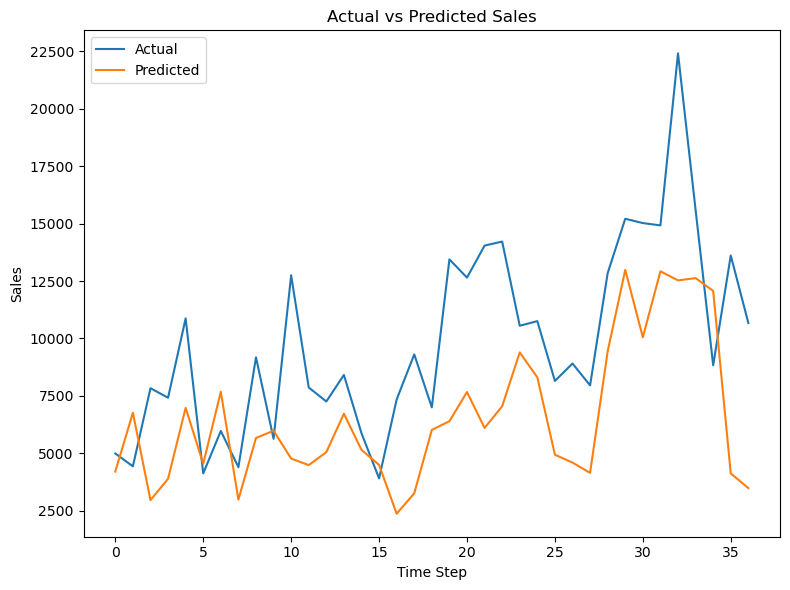

RMSE: 4540.29
MAE: 3747.70
MAPE: 36.48%


In [7]:
# 1) Standard library + ML imports
import os
import tempfile
import pathlib
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# 2) Ray imports
import ray
from ray import tune                                    
from ray.air import session, RunConfig
from ray.train import Checkpoint
from ray.tune.tune_config import TuneConfig
from ray.tune.schedulers import ASHAScheduler

# 3) Global seed & backend setup
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# 4) (Re)start Ray
ray.shutdown()
ray.init(ignore_reinit_error=True, logging_level="ERROR")

# 5) Updated LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True, num_layers=2)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout(out[:, -1, :])
        return self.fc(out)

# 6) Scale target 'Sales' separately
target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(lstm_train[['Sales']].values)
y_test_scaled  = target_scaler.transform(lstm_test[['Sales']].values)

# 7) Prepare feature & scaled target DataFrames
X_train_df = lstm_train.drop(columns=['Sales'])
X_test_df  = lstm_test.drop(columns=['Sales'])
y_train_df = y_train_scaled
y_test_df  = y_test_scaled

# 8) Create sequences
SEQ_LENGTH = 4
def create_sequences(features_df, target_array, seq_length):
    X, y = [], []
    features = features_df.values
    for i in range(len(features) - seq_length):
        X.append(features[i:i+seq_length])
        y.append(target_array[i+seq_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(X_train_df, y_train_df, SEQ_LENGTH)
X_test, y_test   = create_sequences(X_test_df, y_test_df, SEQ_LENGTH)

# 9) Convert to PyTorch tensors
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train).view(-1, 1)
X_test_tensor  = torch.Tensor(X_test)
y_test_tensor  = torch.Tensor(y_test).view(-1, 1)

# 10) Training function for Ray Tune
def train_lstm(config):
    trial_seed = config.get("seed", SEED)
    random.seed(trial_seed)
    np.random.seed(trial_seed)
    torch.manual_seed(trial_seed)
    torch.cuda.manual_seed_all(trial_seed)

    model = LSTMModel(
        input_size=X_train_tensor.shape[2],
        hidden_size=config["hidden_layer_size"]
    )
    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=config["learning_rate"])
    epochs = config.get("epochs", 100)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: loss = {avg_loss:.6f}")
            with tempfile.TemporaryDirectory() as tmpdir:
                torch.save(model.state_dict(), os.path.join(tmpdir, "model.pt"))
                session.report(
                    {"loss": avg_loss},
                    checkpoint=Checkpoint.from_directory(tmpdir)
                )

# 11) Search space and scheduler
search_space = {
    "hidden_layer_size": 128,
    "learning_rate": 0.00625042,
    "epochs": 800,
    "seed": SEED
}
scheduler = ASHAScheduler()

# 12) RunConfig and TuneConfig
trainable = tune.with_resources(train_lstm, {"cpu": 1})
run_cfg = RunConfig(
    name="lstm_experiment",
    stop={"training_iteration": 100},
    storage_path=str(pathlib.Path("E:/datasets/ray_results").resolve()),
    sync_config=None,
    log_to_file=False
)
tune_cfg = TuneConfig(
    metric="loss",
    mode="min",
    num_samples=100,
    scheduler=scheduler
)

# 13) Run the tuner
tuner = tune.Tuner(
    trainable,
    run_config=run_cfg,
    tune_config=tune_cfg,
    param_space=search_space
)
results = tuner.fit()

# 14) Load best model and evaluate
best = results.get_best_result(metric="loss", mode="min")
print("Best hyperparameters:", best.config)
ckpt_dir = best.checkpoint.to_directory()

best_model = LSTMModel(
    input_size=X_train_tensor.shape[2],
    hidden_size=best.config["hidden_layer_size"]
)
best_model.load_state_dict(torch.load(os.path.join(ckpt_dir, "model.pt")))
best_model.eval()

# 15) Predictions and inverse transform
with torch.no_grad():
    y_pred_scaled = best_model(X_test_tensor).numpy()
    y_pred = target_scaler.inverse_transform(y_pred_scaled)
    y_true = target_scaler.inverse_transform(y_test_tensor.numpy())

# 16) Plot
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_true)), y_true, label="Actual", color="tab:blue")
plt.plot(range(len(y_pred)), y_pred, label="Predicted", color="tab:orange")
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.xlabel("Time Step")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# 17) Metrics
def root_mean_squared_error(y_t, y_p):
    return np.sqrt(mean_squared_error(y_t, y_p))

rmse = root_mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-8))) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
